In [2]:
import sys
sys.path.append('../code/')

In [3]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from postprocessing import bias

# Setup

In [4]:
SIMILARITY_PATH = '../results/similarities'
PLOTS_PATH = '../results/plots'

In [5]:
vis.sns_reset()
vis.sns_paper_style()

## Data

In [153]:
df_similarities = io.pd.concat([io.read_csv(io.path_join(SIMILARITY_PATH, f"{model}_{task_name}.csv"), index_col=0) for model in constants.LLMS for task_name in constants.EXPERIMENT_TASKS], ignore_index=True)
df_similarities.loc[:,'group'] = df_similarities.apply(helpers.assign_ax_to_task_param, axis=1)
df_similarities.shape

[2025-01-26 06:13:35] Error: [Errno 2] No such file or directory: '../results/similarities/gemma2-9b_seniority.csv'
[2025-01-26 06:13:35] Error: [Errno 2] No such file or directory: '../results/similarities/gemma2-9b_twins.csv'


(7248, 21)

# Similarity of authors recommended

## Name similarity

#### Per task and param

In [154]:
df_similarities.columns

Index(['model', 'task_name', 'task_param', 'date', 'time', 'level_5',
       'n_name_recommendations', 'n_unique_names_recommendations',
       'n_unique_author_recommendations', 'n_author_hallucinations',
       'name_similarity', 'gender_diversity', 'ethnicity_diversity',
       'scholarly_similarity', 'aps_similarity', 'oa_similarity',
       'aps_career_age_similarity', 'oa_career_age_similarity',
       'institutions_share', 'coauthors_share', 'group'],
      dtype='object')

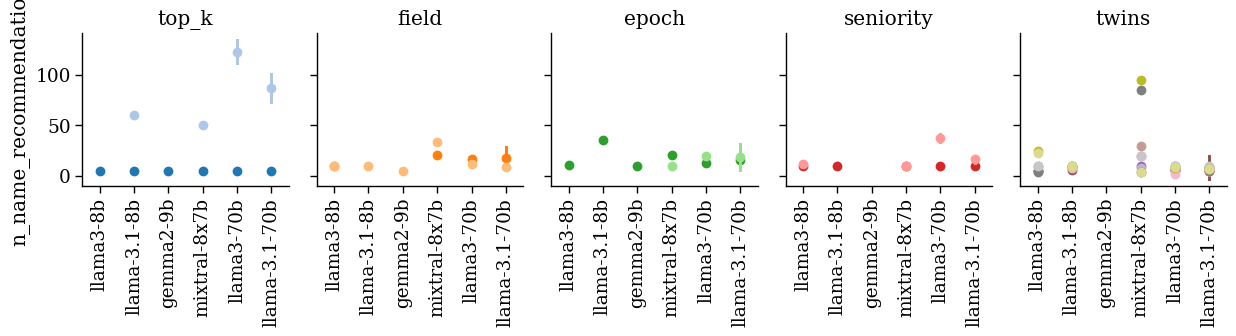

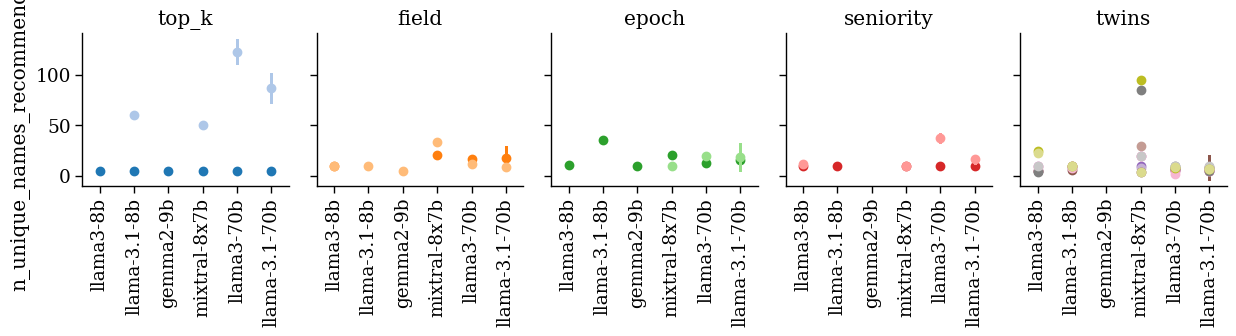

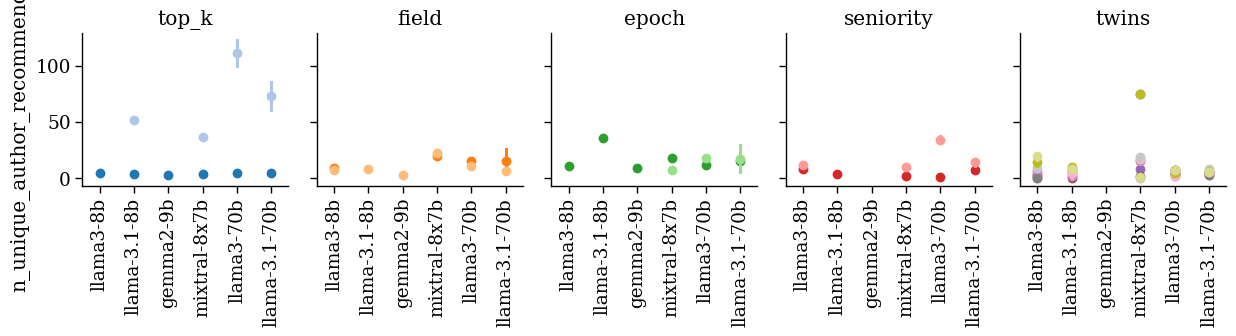

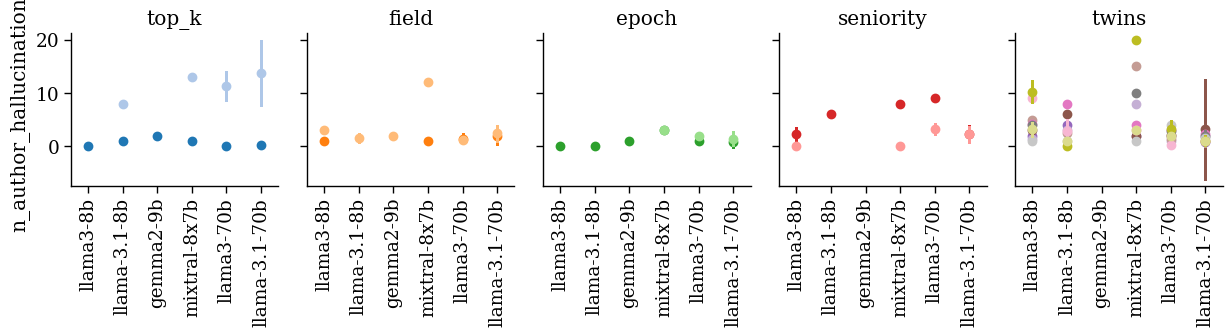

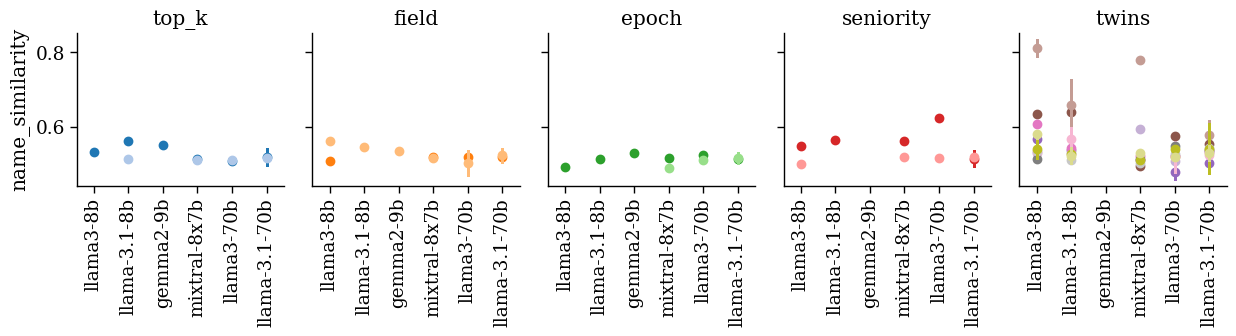

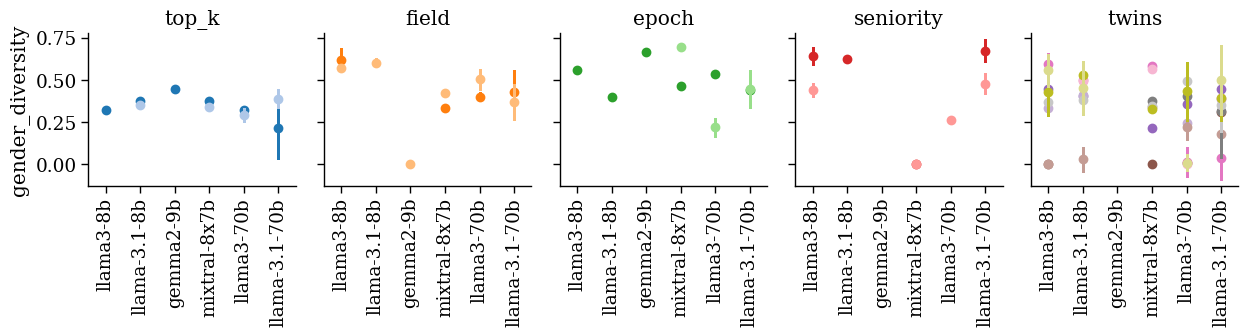

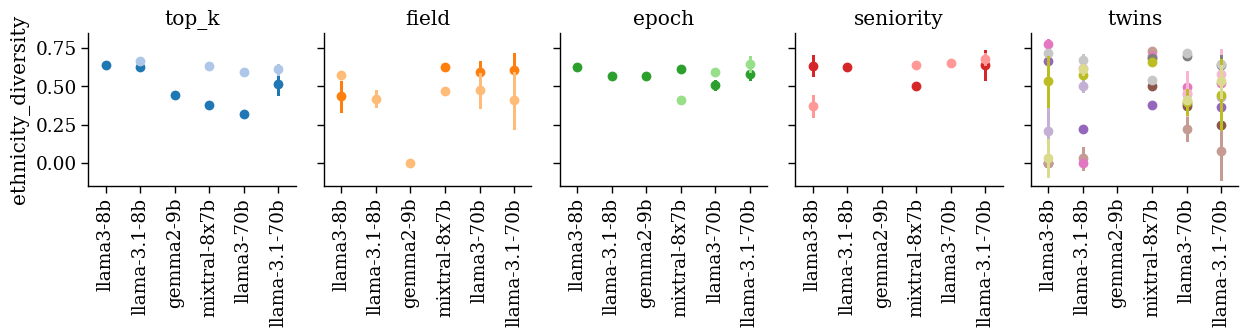

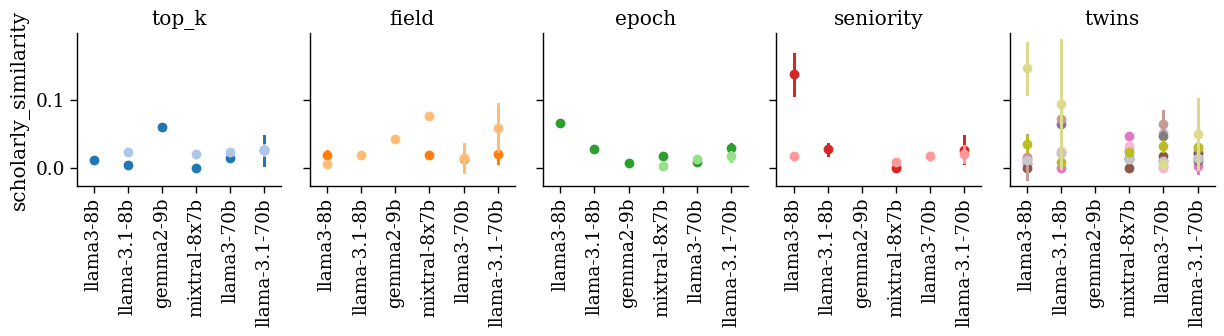

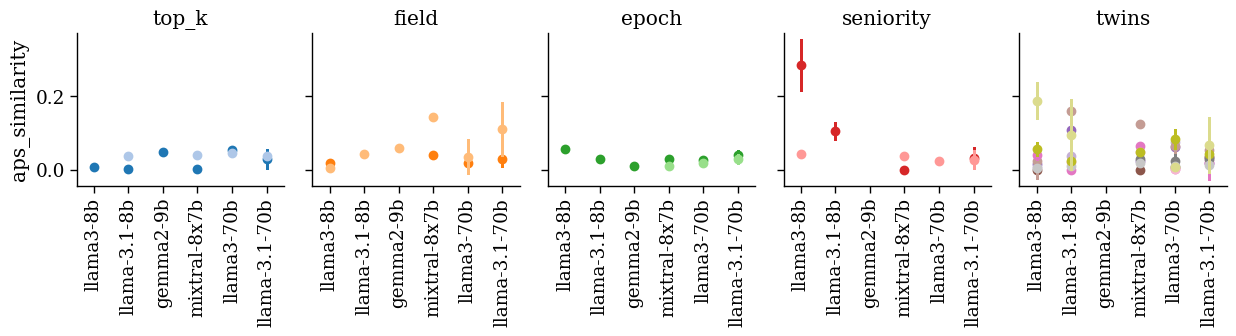

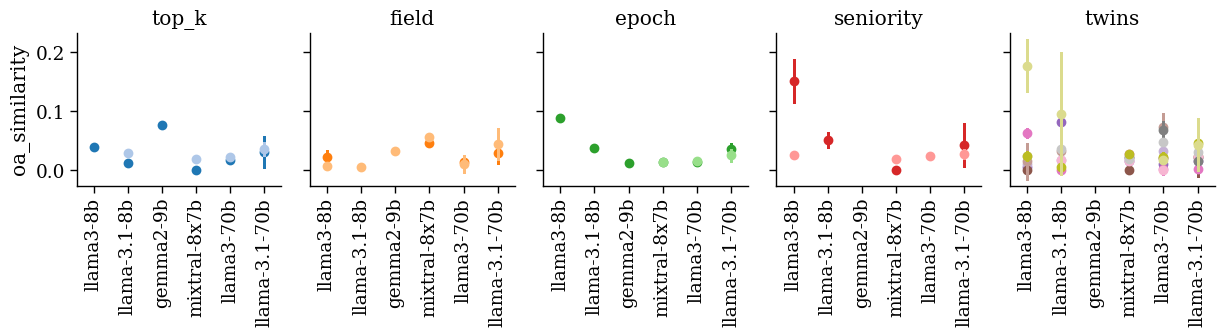

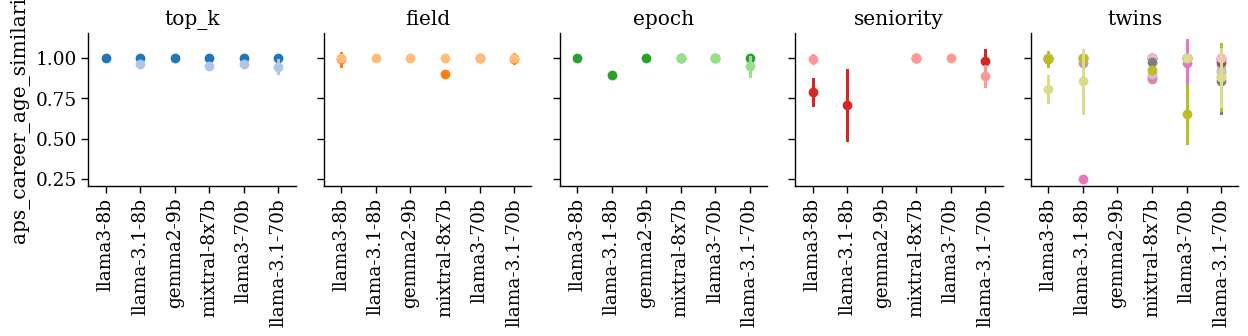

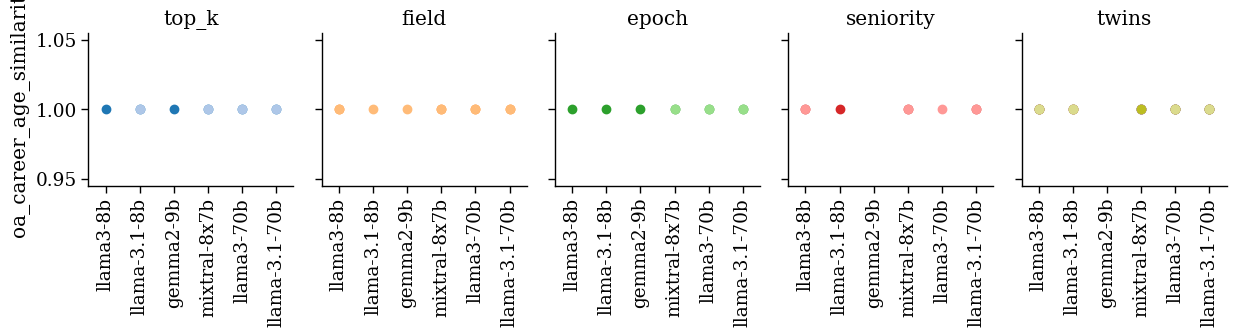

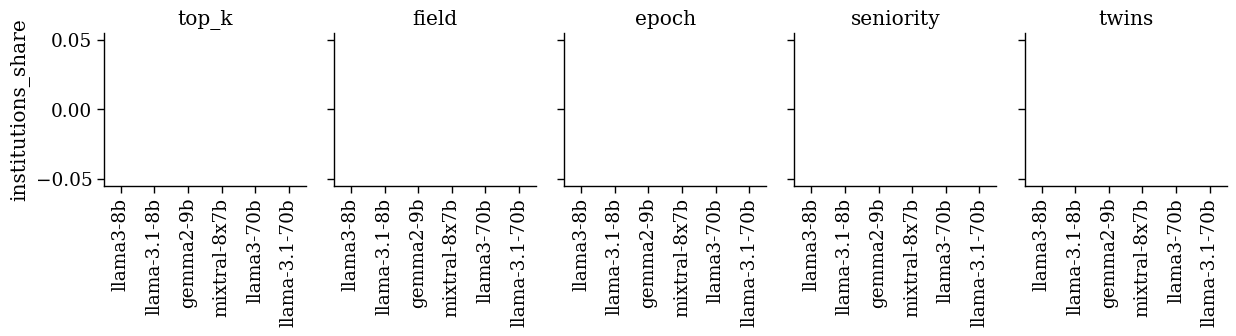

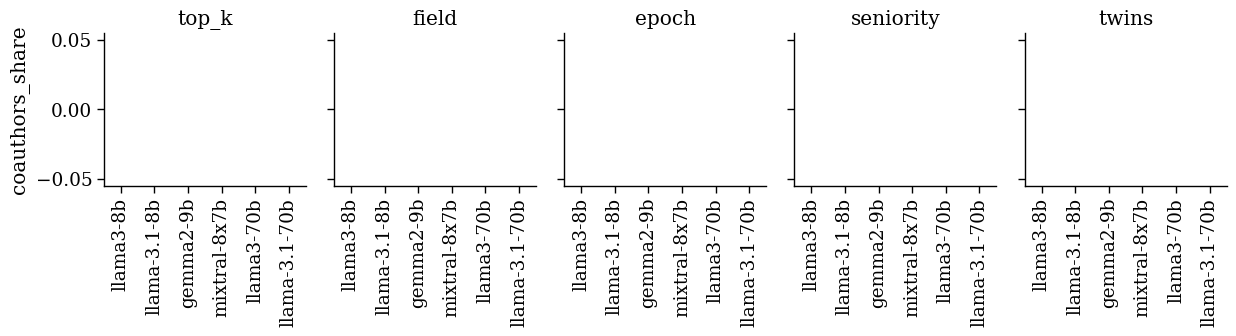

In [255]:
for metric in df_similarities.columns:
    if metric in ['model', 'task_name', 'task_param', 'date', 'time', 'level_5', 'group']:
        continue
    fg = vis.sns.FacetGrid(df_similarities, col="task_name",  
                        hue="task_param", palette='tab20', hue_order=constants.EXPERIMENT_TASK_PARAMS_ORDER_EXPANDED,
                        margin_titles=False, 
                        height=3.6, aspect=0.7)
    fg.map(vis.sns.pointplot, "model", metric,  marker="o", estimator='mean', errorbar=("sd", 1), order=constants.LLMS ,ls='')
    fg.tick_params(axis='x', which='both', rotation=90)
    fg.set_titles("{col_name}") 
    fg.set_xlabels('')
    fg.tight_layout()

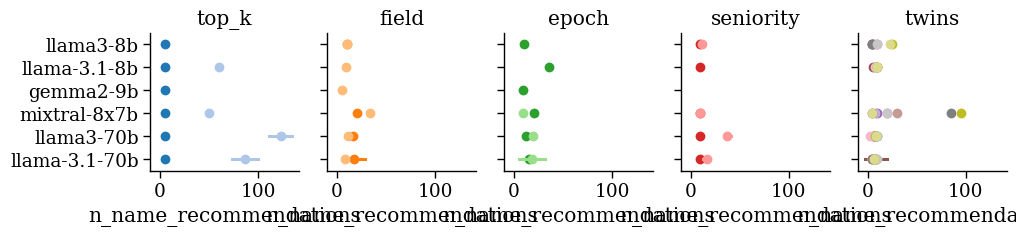

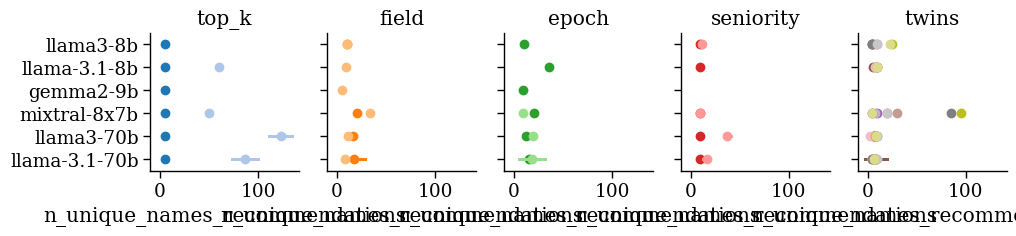

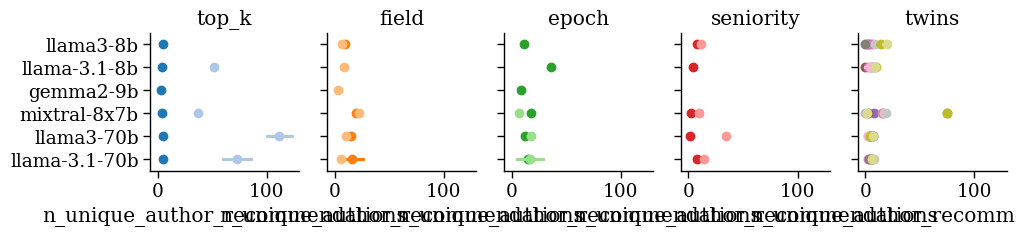

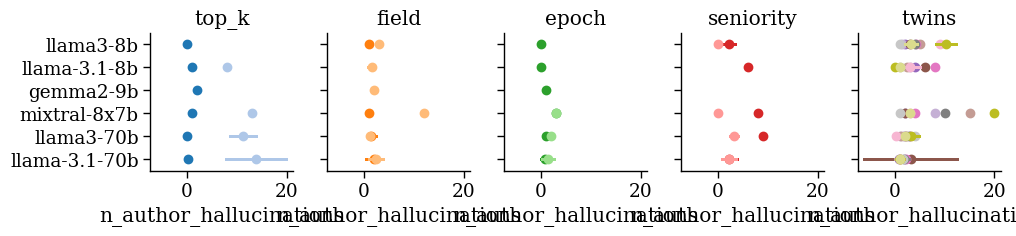

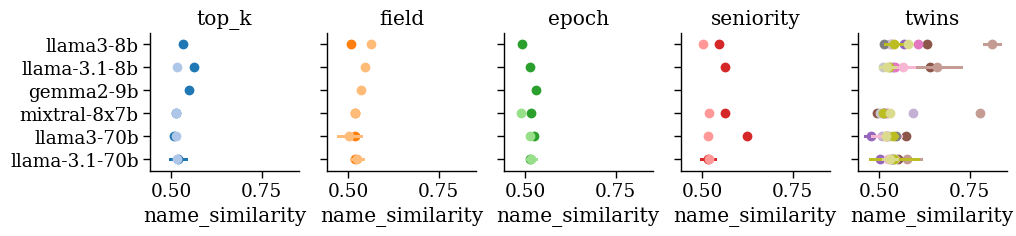

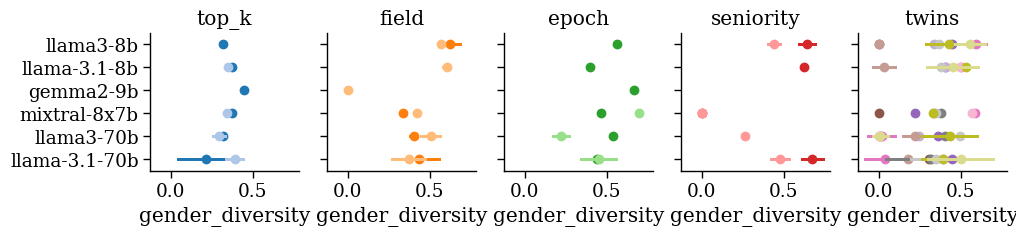

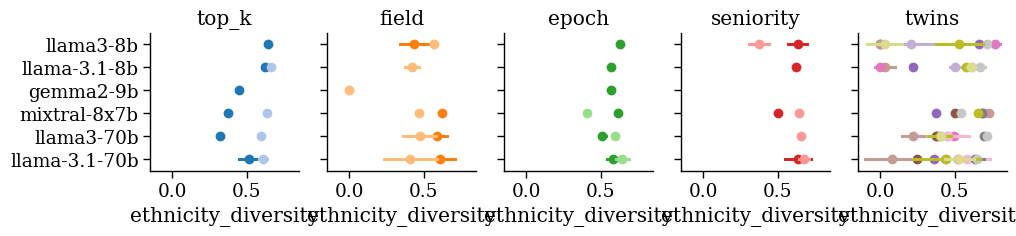

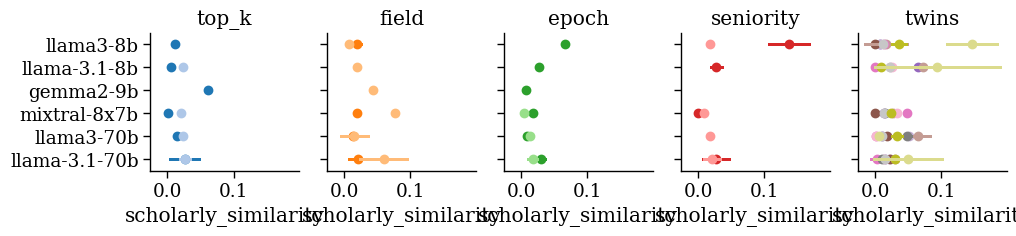

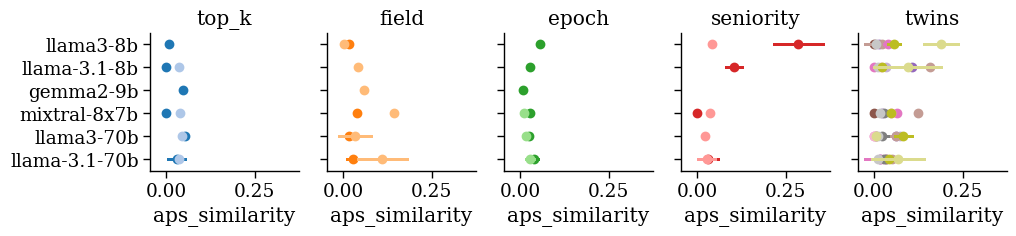

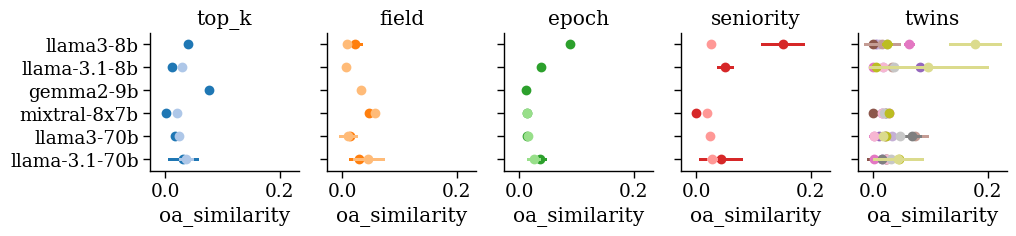

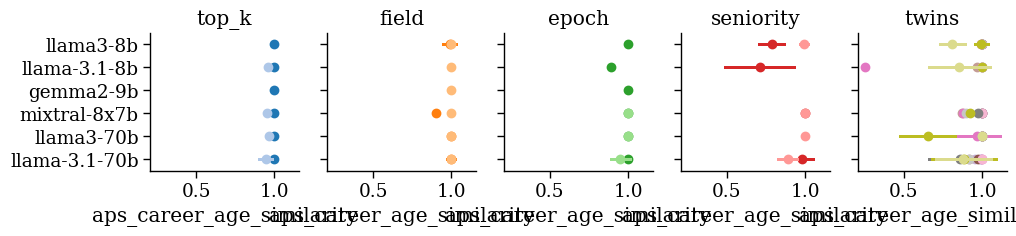

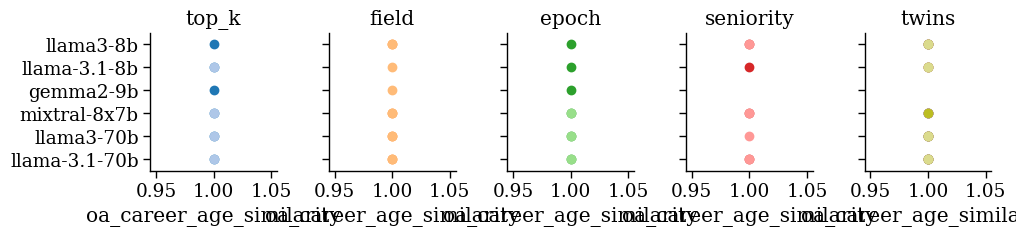

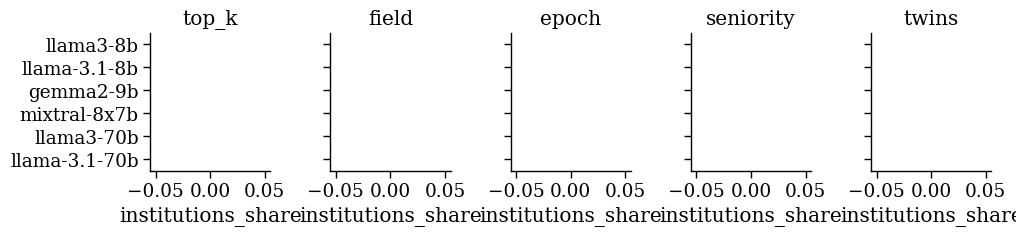

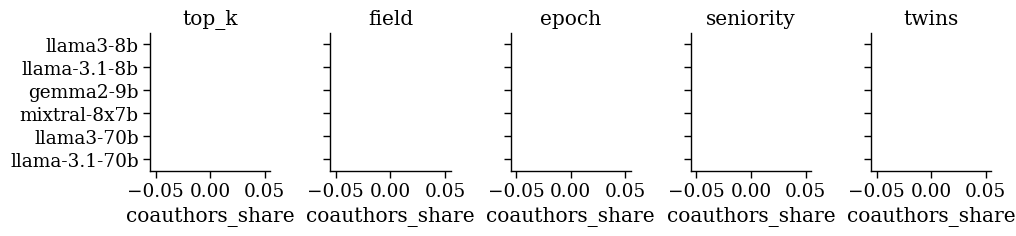

In [254]:
for metric in df_similarities.columns:
    if metric in ['model', 'task_name', 'task_param', 'date', 'time', 'level_5', 'group']:
        continue

    fg = vis.sns.FacetGrid(df_similarities, hue="task_param", col='task_name', palette='tab20', hue_order=constants.EXPERIMENT_TASK_PARAMS_ORDER_EXPANDED,
                            margin_titles=False, height=2.6, aspect=0.8, )
    fg.map(vis.sns.pointplot,  metric, "model",  marker="o", estimator='mean', errorbar=("sd", 1), ls='', order=constants.LLMS)
    fg.tick_params(axis='x', which='both', rotation=0)
    fg.set_titles("{col_name}") 
    fg.set_ylabels('')
    fg.tight_layout()